In [1]:
import pandas as pd
from settings import base_path, Glacier
import os

#plotting
import matplotlib.pyplot as plt
%matplotlib notebook
import plot_funcs

#linear models
import statsmodels.api as sm

import CleanWxData as wx

from settings import *

In [2]:
if Glacier=='Wolverine':
    station_low='370'
    station_high='990'
    temp_col='Temp_USGS'
    station_highest='1420'
if Glacier=='Gulkana':
    station_low='1480'
    station_high='1725'
    #temp_col='TAspirated'
    #temp_col='Tpassive1'
    temp_col='Temp_USGS'
    station_highest='1920'
    
if Glacier == 'SouthCascade':
    station_low='560'
    station_high='1640'
    temp_col='Temp_USGS'

In [3]:
data_dir=base_path +"Data/"+Glacier+ r"/AllYears/Wx/LVL2/"
fl_low=Glacier.lower()+ station_low + "_daily_LVL2.csv"
fl_high=Glacier.lower()+ station_high + "_daily_LVL2.csv"

pth_low=os.path.join(data_dir, fl_low)
pth_high=dat=os.path.join(data_dir, fl_high)

dat_low=pd.read_csv(pth_low, parse_dates=True)
dat_high=pd.read_csv(pth_high, parse_dates=True)

#Rename best daily temperature column
for dat in [dat_low, dat_high]:
    dat.rename(columns={'site_temp_USGS':'Temp_USGS'}, inplace=True)
    new_columns = [w.replace('site_temp', 'Temp') for w in dat.columns]
    dat.columns=new_columns

In [6]:
dat_low.head()

,Date,Temp_min,Temp_max,Temp_WMO,Temp_USGS,Precip__Precip_Precip,RelHum,WindSpeed,RadiationIn,WindDir,VecAvgWindDir,Tpassive1_USGS
0,2010/07/10,11.8,16.1,14.0,13.9,NaN,56.8,3.2,341.2,NaN,NaN,13.93150
1,2010/07/11,6.7,14.9,10.8,12.2,NaN,72.8,4.6,207.9,NaN,NaN,12.16610
2,2010/07/12,0.3,6.3,3.3,2.1,NaN,92.7,8.8,129.9,NaN,NaN,2.11535
3,2010/07/13,-0.1,4.7,2.3,2.3,NaN,93.0,3.5,144.9,NaN,NaN,2.32049
4,2010/07/14,3.2,15.3,9.3,11.0,NaN,64.7,2.4,345.1,NaN,NaN,10.97710


In [7]:
dat_high.head()

,Date,Temp_min,Temp_max,Temp_WMO,Temp_USGS,Tpassive1_USGS
0,1995/06/23,9.7,15.8,12.7,13.3,13.2818
1,1995/06/24,11.5,16.5,14.0,13.7,13.6758
2,1995/06/25,10.5,17.6,14.0,13.1,13.0633
3,1995/06/26,9.7,18.3,14.0,13.2,13.2478
4,1995/06/27,9.7,16.7,13.2,13.5,13.4854


<IPython.core.display.Javascript object>


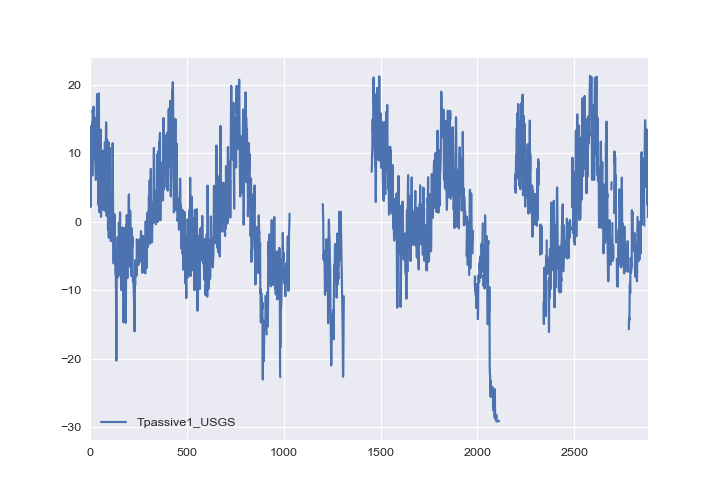

In [8]:
dat_low[[x + "_USGS" for x in temp_columns]].plot()

In [9]:
#Rename columns to reflect what site they came from
dat_low.columns=[dat_low.columns[0]]+list(dat_low.columns[1:] +["_" +station_low])
dat_high.columns=[dat_high.columns[0]]+list(dat_high.columns[1:] +["_" +station_high])

#Make sure that all 'Date' is indeed parsed
for ii in [dat_low, dat_high]:
    ii['Date']=pd.to_datetime(ii.Date)

In [10]:
dat=dat_low.merge(dat_high, on='Date')

In [11]:
dat.head()

,Date,Temp_min_560,Temp_max_560,Temp_WMO_560,Temp_USGS_560,Precip__Precip_Precip_560,RelHum_560,WindSpeed_560,RadiationIn_560,WindDir_560,VecAvgWindDir_560,Tpassive1_USGS_560,Temp_min_1640,Temp_max_1640,Temp_WMO_1640,Temp_USGS_1640,Tpassive1_USGS_1640
0,2010-07-10,11.8,16.1,14.0,13.9,NaN,56.8,3.2,341.2,NaN,NaN,13.93150,10.4,17.6,14.0,13.1,13.09830
1,2010-07-11,6.7,14.9,10.8,12.2,NaN,72.8,4.6,207.9,NaN,NaN,12.16610,9.5,15.5,12.5,12.1,12.13710
2,2010-07-12,0.3,6.3,3.3,2.1,NaN,92.7,8.8,129.9,NaN,NaN,2.11535,2.1,9.2,5.6,4.2,4.23779
3,2010-07-13,-0.1,4.7,2.3,2.3,NaN,93.0,3.5,144.9,NaN,NaN,2.32049,1.1,6.6,3.9,3.8,3.82846
4,2010-07-14,3.2,15.3,9.3,11.0,NaN,64.7,2.4,345.1,NaN,NaN,10.97710,3.9,16.4,10.2,9.6,9.58990


In [12]:
temp_cols=dat.columns[dat.columns.str.contains(temp_col)].tolist()
temp_cols

['Temp_USGS_560', 'Temp_USGS_1640']

In [13]:
dat['t_diff']=dat[temp_cols[1]]- dat[temp_cols[0]]

In [14]:
dat['Date']=pd.to_datetime(dat['Date'])
dat=dat.set_index('Date')

In [15]:
if "USGS" not in temp_col:
    colnm=temp_col +"_USGS_"
else:
    colnm=temp_col+"_" 

a=dat_low[[colnm+station_low]].copy()
a['Elevation']=pd.to_numeric(station_low)
a.columns=['Temperature', 'Elevation']
b=dat_high[[colnm + station_high]].copy()
b['Elevation']=pd.to_numeric(station_high)
b.columns=['Temperature', 'Elevation']
bothsite_temp_dat=a.append(b)

col_x='Elevation'
col_y='Temperature'
res=sm.OLS(bothsite_temp_dat[col_y], sm.add_constant(bothsite_temp_dat[col_x]), missing='drop').fit()
pval=res.pvalues[col_x]
r2=res.rsquared_adj
slope=res.params[col_x]
print(slope*1000)

2.54514511347


In [16]:
#Confidence Interval of slope
res.conf_int(alpha=0.05, cols=None)

,0,1
const,-1.181451,-0.239657
Elevation,0.002190,0.002901


<IPython.core.display.Javascript object>


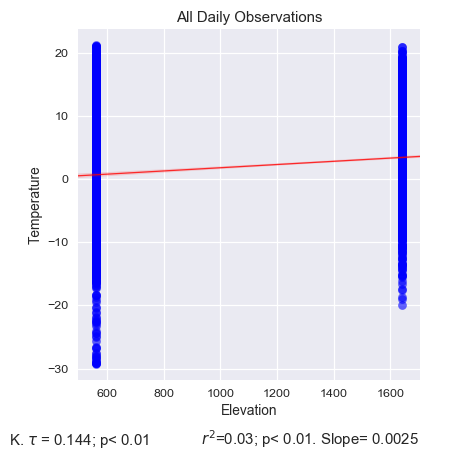

,conf_high,conf_low,kendall_tau,kt_pval,r2,r2_p,slope
0,0.00219,0.002901,0.144019,8.696124e-63,0.031629,5.038781e-44,0.002545


In [17]:
plot_funcs.OLS_plot(col_x, col_y, bothsite_temp_dat, title='All Daily Observations', aspect=1)

In [18]:
print(station_high)
station_low

1640


'560'

In [19]:
dat.t_diff.mean()

2.483454106280194

In [20]:
lapse_rate=dat.t_diff/(pd.to_numeric(station_high)-pd.to_numeric(station_low))

In [21]:
lapse_rate.mean()*1000

2.2994945428520284

In [24]:
print(lapse_rate.min()*1000)
lapse_rate.max()*1000

-30.612244898


18.775510204081638

<IPython.core.display.Javascript object>


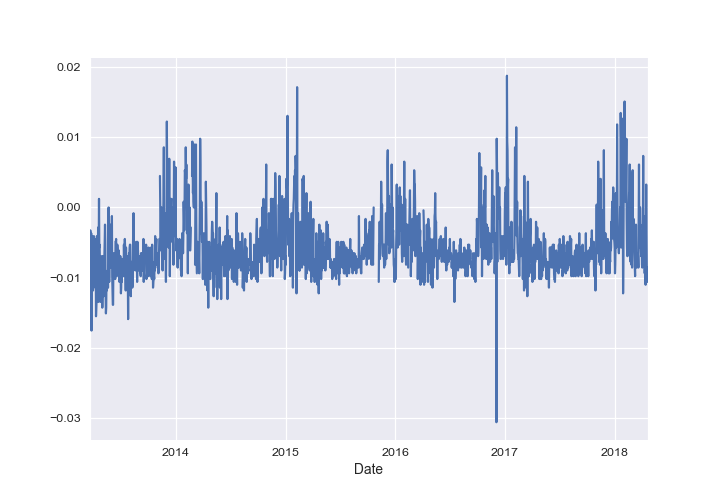

In [25]:
plt.figure()
lapse_rate.plot()

<IPython.core.display.Javascript object>


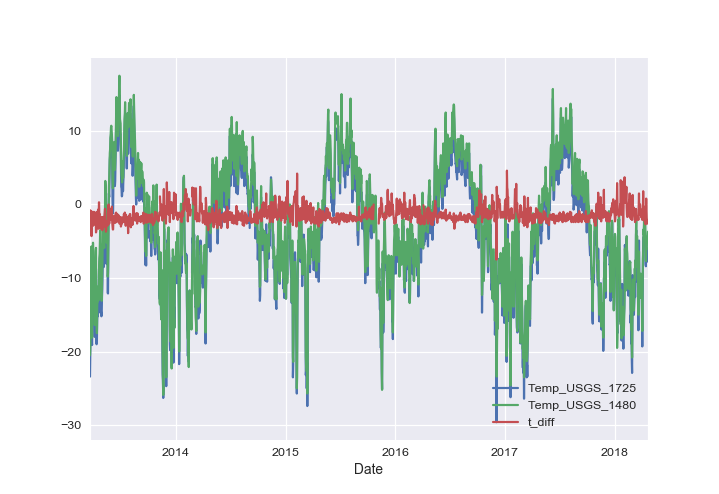

In [26]:
dat[['Temp_USGS_'+station_high, 'Temp_USGS_' +station_low, 't_diff']].plot()

### Aggregate to Monthly and Yearly Means and calculate lapse rates

In [27]:
monthly_dat=pd.DataFrame()
yearly_dat=pd.DataFrame()

#Aggregate high and low at month and year steps
monthly_dat[temp_col+ '_'+ station_high]=wx.aggregate_time_with_threshold(dat[temp_col+ '_'+ station_high], 'MS', steps_in_period=30, func='mean', threshold=0.7)
monthly_dat[temp_col+ '_'+ station_low]=wx.aggregate_time_with_threshold(dat[temp_col+ '_'+ station_low], 'MS', steps_in_period=30, func='mean', threshold=0.7)

yearly_dat[temp_col+ '_'+ station_high]=wx.aggregate_time_with_threshold(dat[temp_col+ '_'+ station_high], 'AS', steps_in_period=365, func='mean', threshold=0.7)
yearly_dat[temp_col+ '_'+ station_low]=wx.aggregate_time_with_threshold(dat[temp_col+ '_'+ station_low], 'AS', steps_in_period=365, func='mean', threshold=0.7)


In [28]:
monthly_dat['t_diff']=monthly_dat[temp_cols[1]]-monthly_dat[temp_cols[0]]
yearly_dat['t_diff']=yearly_dat[temp_cols[1]]-yearly_dat[temp_cols[0]]

In [29]:
monthly_dat.t_diff.mean()

-1.3374206854599369

In [30]:
yrly_lapse_rate=yearly_dat.t_diff/(pd.to_numeric(station_high)-pd.to_numeric(station_low))
yrly_lapse_rate.mean()*1000

-5.435655280219205

In [31]:
monthly_lapse_rate=monthly_dat.t_diff/(pd.to_numeric(station_high)-pd.to_numeric(station_low))
monthly_lapse_rate.mean()*1000

-5.458859940652802

In [32]:
#for dat_ii in [monthly_dat, yearly_dat]:
ii_dat=monthly_dat
a=ii_dat[[colnm+station_low]].copy()
a['Elevation']=pd.to_numeric(station_low)
a.columns=['Temperature', 'Elevation']

b=ii_dat[[colnm + station_high]].copy()
b['Elevation']=pd.to_numeric(station_high)
b.columns=['Temperature', 'Elevation']
bothsite_temp_dat=a.append(b)

In [33]:
bothsite_temp_dat.tail(2)

,Temperature,Elevation
Date,,
2018-03-01,-10.809677,1725
2018-04-01,-7.222727,1725


<IPython.core.display.Javascript object>


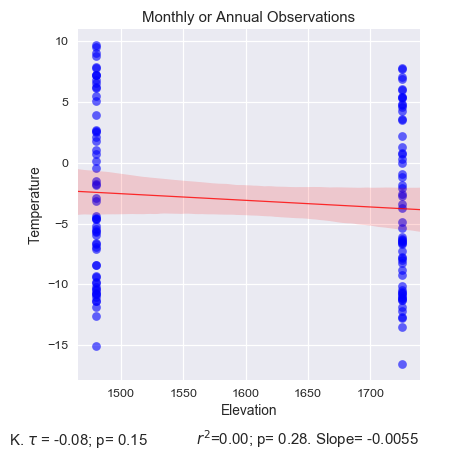

,conf_high,conf_low,kendall_tau,kt_pval,r2,r2_p,slope
0,-0.015611,0.004693,-0.086821,0.156165,0.001101,0.289193,-0.005459


In [34]:
plot_funcs.OLS_plot(col_x, col_y, bothsite_temp_dat, title='Monthly or Annual Observations', aspect=1)

### Analysis with 3 stations

In [35]:
#read in 3rd station data (this is hard-coded...)
fl_highest=Glacier.lower()+ station_highest + "_daily_LVL2.csv"
pth_highest=dat=os.path.join(data_dir, fl_highest)
dat_highest=pd.read_csv(pth_highest, parse_dates=True)

In [36]:
# plt.figure()
# plt.scatter([370]*len(dat_low), dat_low.Temp_USGS_370)
# plt.scatter([990]*len(dat_high), dat_high.Temp_USGS_990)
# plt.scatter([1420]*len(dat_highest), dat_highest.site_temp_USGS)

In [37]:
alltemps=dat_low['Temp_USGS_'+station_low].append(dat_high['Temp_USGS_'+station_high]).append(dat_highest.site_temp_USGS)
alltemps.name='Temperature'

In [38]:
allelev=pd.Series([pd.to_numeric(station_low)]*len(dat_low) + [pd.to_numeric(station_high)]*len(dat_high)  +[pd.to_numeric(station_highest)]*len(dat_highest))
allelev.name='Elevation'
allelev.unique()

array([1480, 1725, 1920], dtype=int64)

In [39]:
station_low

'1480'

In [40]:
df = pd.DataFrame({'Temperature': alltemps.values, 'Elevation':allelev.values}, index=alltemps.index)

In [41]:
df.Elevation.unique()

array([1480, 1725, 1920], dtype=int64)

In [42]:
col_x='Elevation'
col_y='Temperature'
res=sm.OLS(df[col_y], sm.add_constant(df[col_x]), missing='drop').fit()
pval=res.pvalues[col_x]
r2=res.rsquared_adj
slope=res.params[col_x]
print(slope*1000)
print(res.conf_int(alpha=0.05, cols=None))

-6.8749339062
                  0         1
const      5.779232  8.711404
Elevation -0.007796 -0.005954


<IPython.core.display.Javascript object>


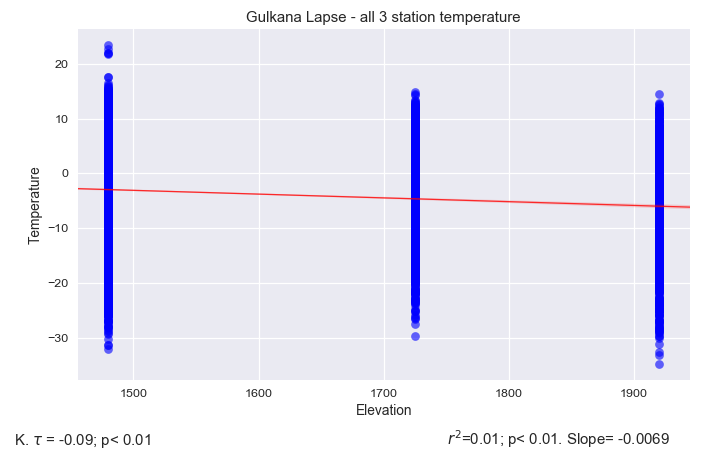

,conf_high,conf_low,kendall_tau,kt_pval,r2,r2_p,slope
0,-0.007796,-0.005954,-0.099163,3.599847e-57,0.018212,5.088271e-48,-0.006875


In [43]:
plot_funcs.OLS_plot(col_x, col_y,dat=df, title= Glacier+ ' Lapse - all 3 station temperature', aspect=1.6)

In [44]:
dat_low.tail(2)

,Date,Temp_min_1480,Temp_max_1480,Temp_WMO_1480,Temp_USGS_1480,TPG_Precip_1480,Stage_Precip_1480,RelHum_1480,WindSpeed_1480,WindGustSpeed_1480,RadiationIn_1480,RadiationOut_1480,SnowDepth_1480,WindDir_1480,VecAvgWindDir_1480,Tpassive1_USGS_1480,Tpassive2_USGS_1480,TAspirated1_USGS_1480,TAspirated2_USGS_1480
8235,2018-04-21,-6.7,-0.8,-3.8,-4.5,5.5,NaN,76.7,2.0,3.7,NaN,NaN,NaN,NaN,211.0,-3.64583,NaN,-4.53646,1.285420
8236,2018-04-22,-6.9,-1.0,-4.0,-3.7,0.0,NaN,59.8,2.6,4.6,NaN,NaN,NaN,NaN,194.0,-2.88646,NaN,-3.67396,0.954167


In [45]:
#Rename to standard column name, make elevation column for all 3 sites
dat_low['site_temp_USGS']=dat_low['Temp_USGS_'+station_low]
dat_high['site_temp_USGS']=dat_high[['Temp_USGS_'+station_high]]

dat_low['Elevation']=pd.to_numeric(station_low)
dat_high['Elevation']=pd.to_numeric(station_high)
dat_highest['Elevation']=pd.to_numeric(station_highest)

In [46]:
#Make single dataframe of all sites temp data for desired time interval
alldat=pd.DataFrame()
all_daily_dat=pd.DataFrame()
for df_ii in [dat_low, dat_high, dat_highest]:
    df_ii=df_ii.reset_index()
    df_ii['Date']=pd.to_datetime(df_ii.Date)
    df_ii.set_index('Date', inplace=True)

    monthly_dat=pd.DataFrame()
    monthly_dat['Temperature']=wx.aggregate_time_with_threshold(df_ii['site_temp_USGS'], 'MS', steps_in_period=30)
    monthly_dat['Elevation']=wx.aggregate_time_with_threshold(df_ii['Elevation'], 'MS', steps_in_period=30)
    alldat=alldat.append(monthly_dat)
    all_daily_dat=all_daily_dat.append(df_ii[['site_temp_USGS', 'Elevation']])

<IPython.core.display.Javascript object>


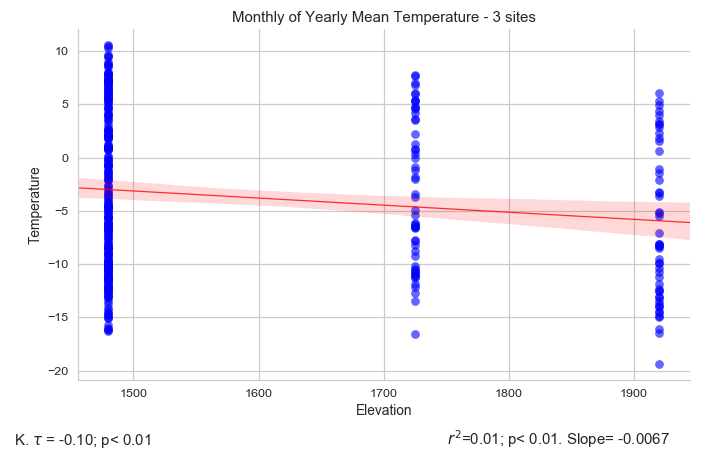

,conf_high,conf_low,kendall_tau,kt_pval,r2,r2_p,slope
0,-0.011238,-0.002091,-0.109435,0.001828,0.019482,0.004404,-0.006665


In [47]:
import seaborn as sns
sns.set_style("whitegrid")
col_x='Elevation'
plot_funcs.OLS_plot(col_x, col_y,dat=alldat, title= 'Monthly of Yearly Mean Temperature - 3 sites', aspect=1.6)

In [48]:
#Drop all instances when all 3 stations are NOT reporting
out=all_daily_dat.reset_index().pivot_table(values='site_temp_USGS', index=['Date'], columns=['Elevation'])
out.tail()

Elevation,1480,1725,1920
Date,,,
2018-04-18,-5.6,-7.8,NaN
2018-04-19,-4.4,-6.5,NaN
2018-04-20,-5.0,-7.3,NaN
2018-04-21,-4.5,-7.1,NaN
2018-04-22,-3.7,-6.2,NaN


In [49]:
all3daily=out.dropna()

In [50]:
all3daily=pd.melt(all3daily.reset_index(), id_vars='Date', value_name='Temperature')

In [51]:
all3daily=all3daily.set_index('Date')

In [52]:
all3daily['Temperature']=pd.to_numeric(all3daily.Temperature)
all3daily['Elevation']=pd.to_numeric(all3daily.Elevation)

<IPython.core.display.Javascript object>


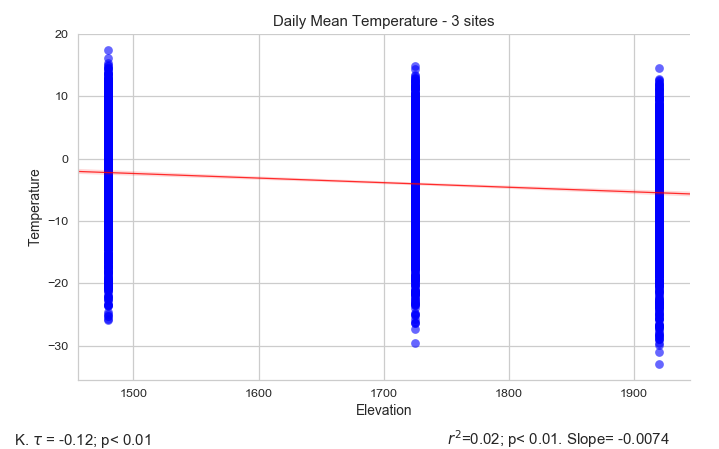

,conf_high,conf_low,kendall_tau,kt_pval,r2,r2_p,slope
0,-0.008719,-0.006026,-0.120723,1.163338e-32,0.02574,1.541375e-26,-0.007373


In [53]:
plot_funcs.OLS_plot(col_x, col_y,dat=all3daily, title= 'Daily Mean Temperature - 3 sites', aspect=1.6)

In [54]:
A=all3daily.pivot(columns='Elevation')

<IPython.core.display.Javascript object>


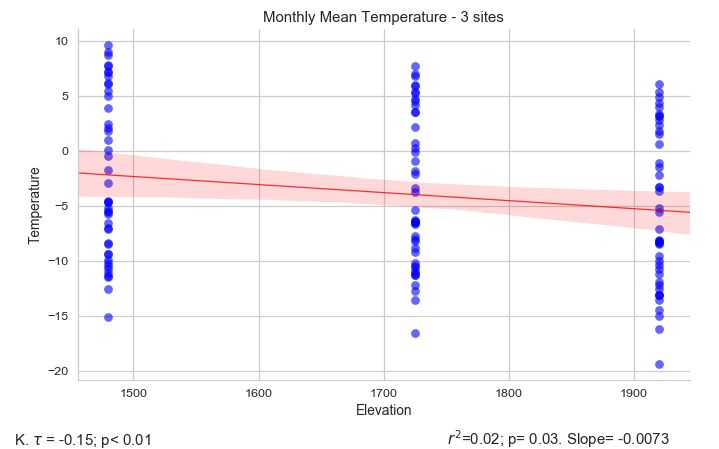

,conf_high,conf_low,kendall_tau,kt_pval,r2,r2_p,slope
0,-0.014082,-0.000577,-0.152971,0.009276,0.026826,0.033622,-0.00733


In [57]:
sites=[station_low, station_high, station_highest]
monthly_datas=pd.DataFrame()
for site in sites:
    agdat_ii=pd.DataFrame()
    agdat_ii['Temperature']=wx.aggregate_time_with_threshold(all3daily.loc[all3daily.Elevation==pd.to_numeric(site), 'Temperature'], 'MS', steps_in_period=30, threshold=0.8)
    agdat_ii['Elevation']=pd.to_numeric(site)
    
    monthly_datas=monthly_datas.append(agdat_ii)

plot_funcs.OLS_plot(col_x, col_y,dat=monthly_datas, title= 'Monthly Mean Temperature - 3 sites', aspect=1.6)

<IPython.core.display.Javascript object>


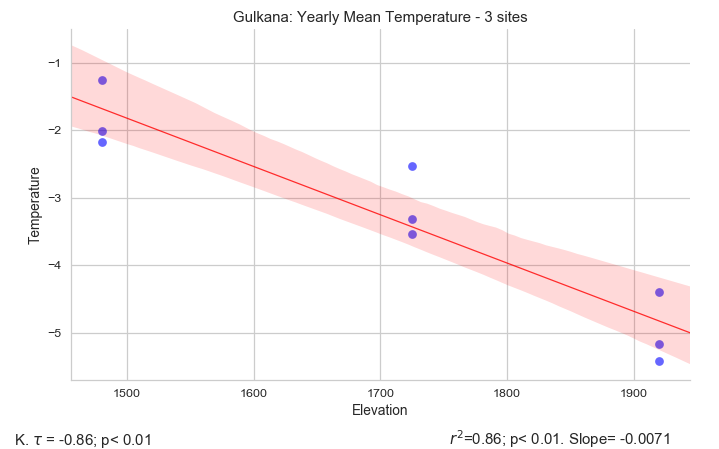

,conf_high,conf_low,kendall_tau,kt_pval,r2,r2_p,slope
0,-0.009505,-0.004785,-0.866025,0.001152,0.862668,0.000184,-0.007145


In [58]:
sites=[station_low, station_high, station_highest]
yearly_datas=pd.DataFrame()
for site in sites:
    agdat_ii=pd.DataFrame()
    agdat_ii['Temperature']=wx.aggregate_time_with_threshold(all3daily.loc[all3daily.Elevation==pd.to_numeric(site), 'Temperature'], 'AS', steps_in_period=365, threshold=0.8)
    agdat_ii['Elevation']=pd.to_numeric(site)
    
    yearly_datas=yearly_datas.append(agdat_ii)

plot_funcs.OLS_plot(col_x, col_y,dat=yearly_datas, title= Glacier+ ': Yearly Mean Temperature - 3 sites', aspect=1.6)

In [70]:
yearly_datas

,Temperature,Elevation
Date,,
2012-01-01,NaN,370
2013-01-01,NaN,370
2014-01-01,3.666575,370
2015-01-01,NaN,370
2016-01-01,NaN,370
2017-01-01,NaN,370
2018-01-01,NaN,370
2012-01-01,NaN,990
2013-01-01,NaN,990


In [45]:
#Stuff below here is trying and failing to reshape to drop time steps where we don't have all 3 sites
alldat.head()

,Temperature,Elevation
Date,,
1995-01-01,-8.301124,1480.0
1996-01-01,-4.152210,1480.0
1997-01-01,-2.713736,1480.0
1998-01-01,-2.765915,1480.0
1999-01-01,-4.259452,1480.0


In [46]:
#alldat=alldat.reset_index()
alldat['Elevation']=alldat.Elevation.astype(pd.np.float64)
out=alldat.pivot_table(columns=['Elevation', 'Date'], values='Temperature')

KeyError: 'Date'

In [ ]:
out.reset_index()